In [ ]:
EXERCICE DE NETTOYAGE, TRANSFORMATION ET PREPARATION DE CES DONNEES

In [19]:
#chargement du jeu de donnees
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('titanic3.xls')
df2 = df.copy()

In [20]:
#resume sur le jeu de donnees
df2.info()
df2.describe()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


(1309, 14)

In [21]:
#supprimer les variables non pertinentes
df2.drop('name', axis=1, inplace=True)
df2.drop('ticket', axis=1, inplace=True)
df2.drop('fare', axis=1, inplace=True)
df2.drop('embarked', axis=1, inplace=True)
df2.drop('boat', axis=1, inplace=True)
df2.drop('body', axis=1, inplace=True)
df2.drop('home.dest', axis=1, inplace=True)
df2

,pclass,survived,sex,age,sibsp,parch,cabin
0,1,1,female,29.0000,0,0,B5
1,1,1,male,0.9167,1,2,C22 C26
2,1,0,female,2.0000,1,2,C22 C26
3,1,0,male,30.0000,1,2,C22 C26
4,1,0,female,25.0000,1,2,C22 C26
...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,NaN
1305,3,0,female,NaN,1,0,NaN
1306,3,0,male,26.5000,0,0,NaN
1307,3,0,male,27.0000,0,0,NaN


In [22]:
#rechercher des valeurs manquantes
df2.isnull().sum()

pclass         0
survived       0
sex            0
age          263
sibsp          0
parch          0
cabin       1014
dtype: int64

In [23]:
#remplacer les valeurs manquantes
df2['age'].fillna(df['age'].mean(0),inplace=True)

In [24]:
# les differentes valeurs que peux prendre la variable cabin
print(df2['cabin'].value_counts())
df2['cabin'].fillna('C23',inplace=True)

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
C132               1
E60                1
B52 B54 B56        1
C49                1
F38                1
Name: cabin, Length: 186, dtype: int64


In [25]:
# encodage par creation d'un dictionnaire de donnees

In [26]:
cleanup_nums = {
    'sex' : {'male': 1, 'female' : 0}
}
df2.replace(cleanup_nums, inplace=True)
df2

,pclass,survived,sex,age,sibsp,parch,cabin
0,1,1,0,29.000000,0,0,B5
1,1,1,1,0.916700,1,2,C22 C26
2,1,0,0,2.000000,1,2,C22 C26
3,1,0,1,30.000000,1,2,C22 C26
4,1,0,0,25.000000,1,2,C22 C26
...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,C23
1305,3,0,0,29.881135,1,0,C23
1306,3,0,1,26.500000,0,0,C23
1307,3,0,1,27.000000,0,0,C23


In [27]:
# encodage par etiquettes

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df2['cabin'] =encoder.fit_transform(df2['cabin'])
df2

,pclass,survived,sex,age,sibsp,parch,cabin
0,1,1,0,29.000000,0,0,43
1,1,1,1,0.916700,1,2,79
2,1,0,0,2.000000,1,2,79
3,1,0,1,30.000000,1,2,79
4,1,0,0,25.000000,1,2,79
...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,80
1305,3,0,0,29.881135,1,0,80
1306,3,0,1,26.500000,0,0,80
1307,3,0,1,27.000000,0,0,80


<AxesSubplot:xlabel='cabin', ylabel='age'>

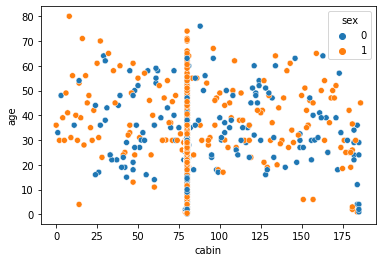

In [74]:
sns.scatterplot(data=df2, x='cabin',y='age', hue='sex')